In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set()

# Import data and initial presentation of data

In [2]:
employement_rate = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/EMP_RATE_by_birth_place_and_EDUC.csv')
stratio = pd.read_csv('./projetMODS206/code/MODS206/data/education_system/student_teacher_ratio.csv')
min_wage = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/real minimum wage from 2001 to 2019.csv')
avg_duration_unemployment = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/average duration of unemployment.csv')
strictness_emply_protec = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/strictness of employment protection from 1998 to 2018.csv')
short_time_workers = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of short time workers from 2000.csv')
involuntary_pt_workers = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of involuntary part time workers from 2000.csv')
well_matched_skills_jobs = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of well matched skills for jobs.csv', dtype='unicode')
ft_and_pt_employ = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of full time part time employment.csv')
marginally_attached_workers = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of marginally attached workers from 2000.csv')
public_exp_LMP = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/public_exp_LMP.csv')
employees_bargain = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of employees that can bargain from 1998.csv')

In [3]:
oecd_countries = {'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHL': 'Chile', 'COL': 'Colombia', 'CZE': 'Czech Republic', 'DNK': 'Denmark', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'DEU': 'Germany', 'GRC': 'Greece', 'HUN': 'Hungary', 'ISL': 'Iceland', 'IRL': 'Ireland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LVA': 'Latvia', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NZL': 'New Zealand', 'NOR': 'Norway', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovakia', 'SVN': 'Slovenia', 'ESP': 'Spain', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'TUR': 'Turkey', 'GBR': 'United Kingdom', 'USA': 'United States'}

## minimum wage

In [4]:
min_wage = min_wage[(min_wage.SERIES == "PPP") & (min_wage.PERIOD == "A")][['Country', 'Time', 'Value']]

Text(0.5, 1.0, 'minimum wage of OECD countries from 2001 to 2019 in PPP USD')

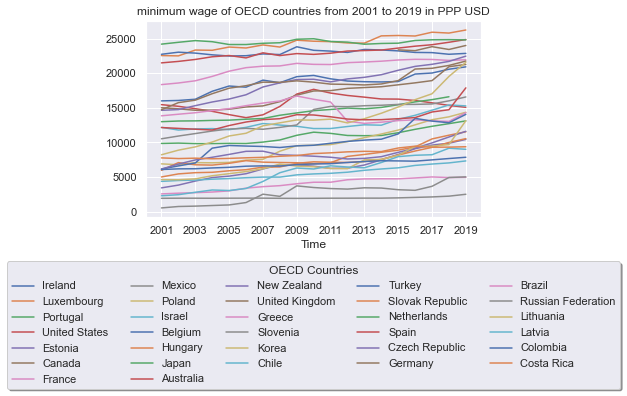

In [5]:
time_range= min_wage['Time'].unique()
countries = min_wage['Country'].unique()
ax = min_wage[(min_wage.Country == countries[0])].plot(x = "Time", y = "Value", label = countries[0], xticks = [2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])
for j in range(1, len(countries)):
    min_wage[(min_wage.Country == countries[j])].plot(x = "Time", y = "Value", ax = ax, label = countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("minimum wage of OECD countries from 2001 to 2019 in PPP USD")

### countries by min_wage categories in 2019

In [6]:
avg_wage = min_wage[(min_wage.Time == 2019)]["Value"].mean()
std_wage = min_wage[min_wage.Time == 2019]["Value"].std()
very_poor_countries = min_wage[(min_wage.Time == 2019) & (min_wage.Value < avg_wage - std_wage)]["Country"].reset_index(drop = True)
poor_countries = min_wage[(min_wage.Time == 2019) & (avg_wage - std_wage <= min_wage.Value) & (min_wage.Value < avg_wage)]["Country"].reset_index(drop = True)
rich_countries = min_wage[(min_wage.Time == 2019) & (avg_wage <= min_wage.Value) & (min_wage.Value < avg_wage + std_wage)]["Country"].reset_index(drop = True)
very_rich_countries = min_wage[(min_wage.Time == 2019) & (min_wage.Value >= avg_wage + std_wage)]["Country"].reset_index(drop = True)


Text(0.5, 1.0, 'minimum wage of very poor OECD countries from 2001 to 2019 in PPP USD')

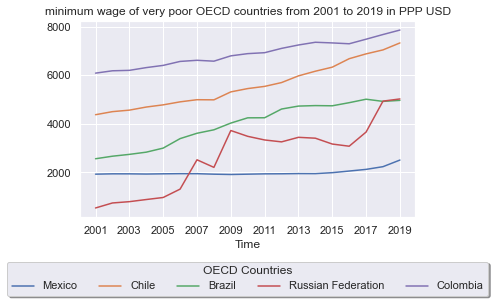

In [7]:
ax = min_wage[(min_wage.Country == very_poor_countries[0])].plot(x = "Time", y = "Value", label = very_poor_countries[0], xticks = [2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])
for j in range(1, len(very_poor_countries)):
    min_wage[(min_wage.Country == very_poor_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = very_poor_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("minimum wage of very poor OECD countries from 2001 to 2019 in PPP USD")

Text(0.5, 1.0, 'minimum wage of poor OECD countries from 2001 to 2019 in PPP USD')

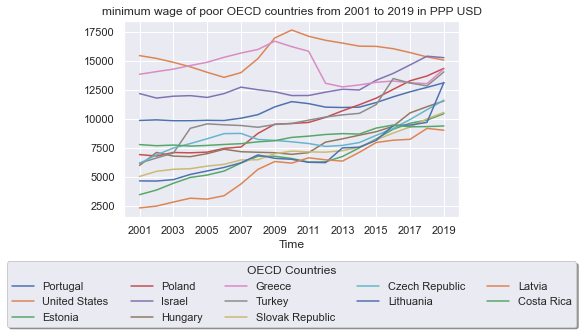

In [8]:
ax = min_wage[(min_wage.Country == poor_countries[0])].plot(x = "Time", y = "Value", label = poor_countries[0], xticks = [2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])
for j in range(1, len(poor_countries)):
    min_wage[(min_wage.Country == poor_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = poor_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("minimum wage of poor OECD countries from 2001 to 2019 in PPP USD")

Text(0.5, 1.0, 'minimum wage of rich OECD countries from 2001 to 2019 in PPP USD')

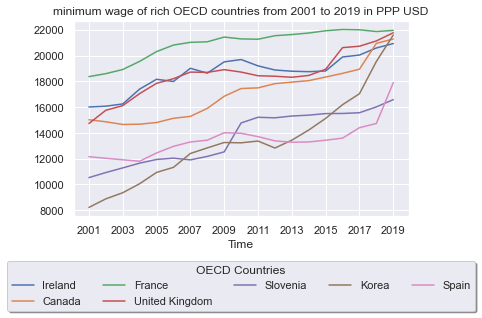

In [9]:
ax = min_wage[(min_wage.Country == rich_countries[0])].plot(x = "Time", y = "Value", label = rich_countries[0], xticks = [2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])
for j in range(1, len(rich_countries)):
    min_wage[(min_wage.Country == rich_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = rich_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("minimum wage of rich OECD countries from 2001 to 2019 in PPP USD")

Text(0.5, 1.0, 'minimum wage of very rich OECD countries from 2001 to 2019 in PPP USD')

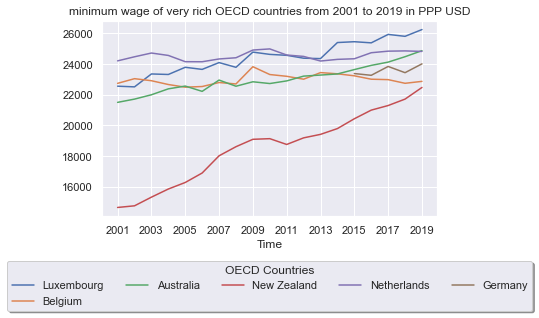

In [10]:
ax = min_wage[(min_wage.Country == very_rich_countries[0])].plot(x = "Time", y = "Value", label = very_rich_countries[0], xticks = [2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])
for j in range(1, len(very_rich_countries)):
    min_wage[(min_wage.Country == very_rich_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = very_rich_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("minimum wage of very rich OECD countries from 2001 to 2019 in PPP USD")

### countries who faced huge evolution in min_wages

Text(0.5, 1.0, 'minimum wage of changing OECD countries from 2001 to 2019 in PPP USD')

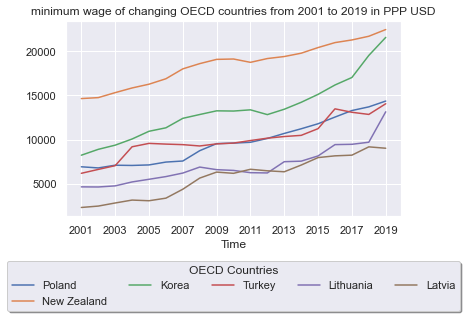

In [11]:
dict_stds =  {}
for country in countries:
    dict_stds[country] = min_wage[min_wage.Country == country]["Value"].std()

stds = list(dict_stds.values())
mean_stds = np.mean(stds)
std_stds = np.std(stds)
mw_changing_countries = []
for country in countries:
    if dict_stds[country] >= mean_stds + std_stds:
        mw_changing_countries.append(country)
    
ax = min_wage[(min_wage.Country == mw_changing_countries[0])].plot(x = "Time", y = "Value", label = mw_changing_countries[0], xticks = [2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])
for j in range(1, len(mw_changing_countries)):
    min_wage[(min_wage.Country == mw_changing_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = mw_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("minimum wage of changing OECD countries from 2001 to 2019 in PPP USD")

## public expenditure in Labor Market Programs as a share of GDP

In [12]:
public_exp_LMP = public_exp_LMP[['Country', 'Programmes', 'Time', 'Value']]
job_creation = public_exp_LMP[public_exp_LMP.Programmes == "Direct job creation"]
total = public_exp_LMP[public_exp_LMP.Programmes == "Total"]
training = public_exp_LMP[public_exp_LMP.Programmes == "Training"]
apprenticeship = public_exp_LMP[public_exp_LMP.Programmes == "Special support for apprenticeship"]
time_range = public_exp_LMP["Time"].unique()
time_range

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

### job_creation

In [13]:
avg_jc = job_creation[(job_creation.Time == 2018)]["Value"].mean()
std_jc = job_creation[job_creation.Time == 2018]["Value"].std()
vlow_jc_countries = job_creation[(job_creation.Time == 2018) & (job_creation.Value < avg_jc - 0.5*std_jc)]["Country"].reset_index(drop = True)
low_jc_countries = job_creation[(job_creation.Time == 2018) & (avg_jc - 0.5*std_jc <= job_creation.Value) & (job_creation.Value < avg_jc)]["Country"].reset_index(drop = True)
high_jc_countries = job_creation[(job_creation.Time == 2018) & (avg_jc <= job_creation.Value) & (job_creation.Value < avg_jc + 0.5*std_jc)]["Country"].reset_index(drop = True)
vhigh_jc_countries = job_creation[(job_creation.Time == 2018) & (job_creation.Value >= avg_jc + 0.5*std_jc)]["Country"].reset_index(drop = True)

Text(0.5, 1.0, 'share of public spendings as a share of GDP in direct job creation  of very low spending OECD countries from 2004 to 2018')

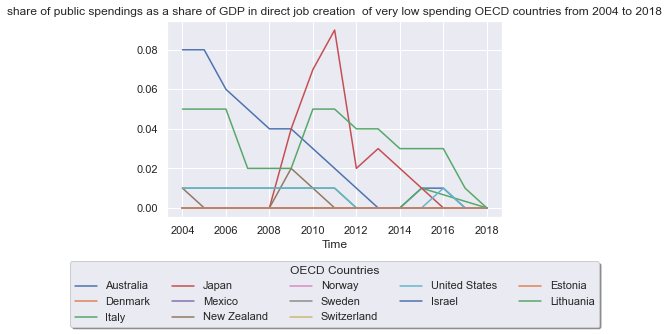

In [14]:
ax = job_creation[(job_creation.Country == vlow_jc_countries[0])].plot(x = "Time", y = "Value", label = vlow_jc_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(vlow_jc_countries)):
    job_creation[(job_creation.Country == vlow_jc_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = vlow_jc_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in direct job creation  of very low spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in direct job creation  of low spending OECD countries from 2004 to 2018')

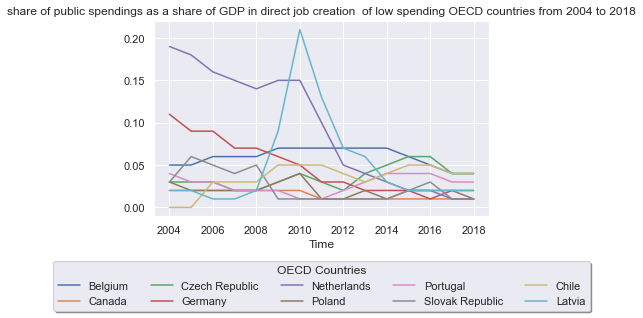

In [15]:
ax = job_creation[(job_creation.Country == low_jc_countries[0])].plot(x = "Time", y = "Value", label = low_jc_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(low_jc_countries)):
    job_creation[(job_creation.Country == low_jc_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = low_jc_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in direct job creation  of low spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in direct job creation  of high spending OECD countries from 2004 to 2018')

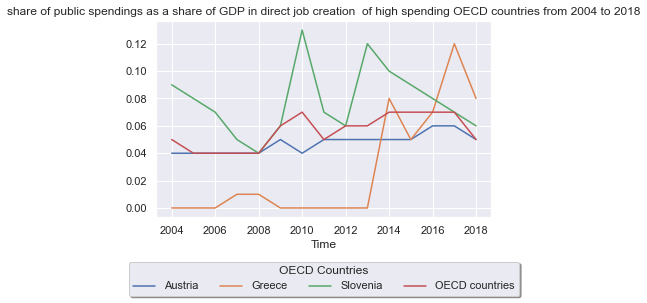

In [16]:
ax = job_creation[(job_creation.Country == high_jc_countries[0])].plot(x = "Time", y = "Value", label = high_jc_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(high_jc_countries)):
    job_creation[(job_creation.Country == high_jc_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = high_jc_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in direct job creation  of high spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in direct job creation  of very high spending OECD countries from 2004 to 2018')

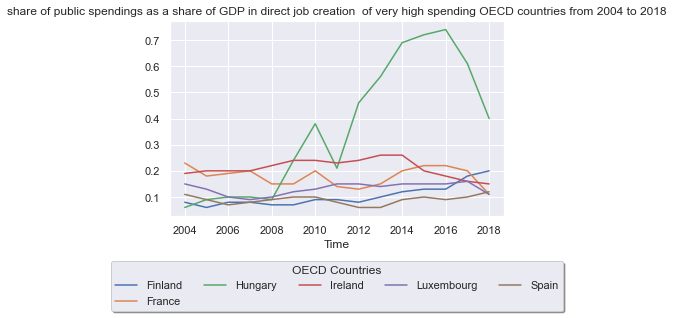

In [17]:
ax = job_creation[(job_creation.Country == vhigh_jc_countries[0])].plot(x = "Time", y = "Value", label = vhigh_jc_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(vhigh_jc_countries)):
    job_creation[(job_creation.Country == vhigh_jc_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = vhigh_jc_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in direct job creation  of very high spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in direct job creation of changing OECD countries from 2004 to 2018 in PPP USD')

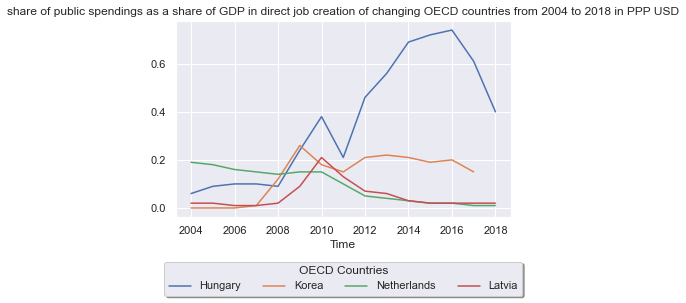

In [19]:
dict_stds =  {}
countries = job_creation["Country"].unique()
for country in countries:
    dict_stds[country] = job_creation[job_creation.Country == country]["Value"].std()

stds = list(dict_stds.values())
mean_stds = np.mean(stds)
std_stds = np.std(stds)
jc_changing_countries = []
for country in countries:
    if dict_stds[country] >= mean_stds + 0.5*std_stds:
        jc_changing_countries.append(country)
    
ax = job_creation[(job_creation.Country == jc_changing_countries[0])].plot(x = "Time", y = "Value", label = jc_changing_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(jc_changing_countries)):
    job_creation[(job_creation.Country == jc_changing_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = jc_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in direct job creation of changing OECD countries from 2004 to 2018 in PPP USD")

### total expenditures

In [20]:
avg_tot = total[(total.Time == 2018)]["Value"].mean()
std_tot = total[total.Time == 2018]["Value"].std()
vlow_tot_countries = total[(total.Time == 2018) & (total.Value < avg_tot - 0.5*std_tot)]["Country"].reset_index(drop = True)
low_tot_countries = total[(total.Time == 2018) & (avg_tot - 0.5*std_tot <= total.Value) & (total.Value < avg_tot)]["Country"].reset_index(drop = True)
high_tot_countries = total[(total.Time == 2018) & (avg_tot <= total.Value) & (total.Value < avg_tot + 0.5*std_tot)]["Country"].reset_index(drop = True)
vhigh_tot_countries = total[(total.Time == 2018) & (total.Value >= avg_tot + 0.5*std_tot)]["Country"].reset_index(drop = True)

Text(0.5, 1.0, 'share of public spendings as a share of GDP in all LMP of very low spending OECD countries from 2004 to 2018')

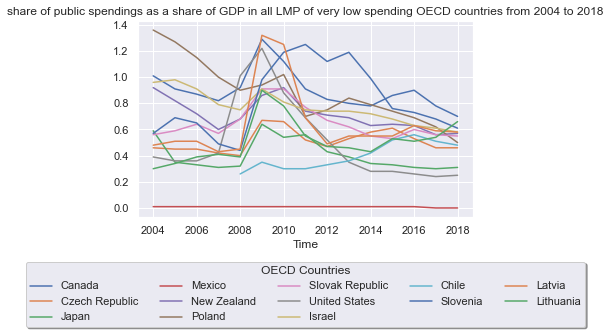

In [21]:
ax = total[(total.Country == vlow_tot_countries[0])].plot(x = "Time", y = "Value", label = vlow_tot_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(vlow_tot_countries)):
    total[(total.Country == vlow_tot_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = vlow_tot_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in all LMP of very low spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in all LMP of low spending OECD countries from 2004 to 2018')

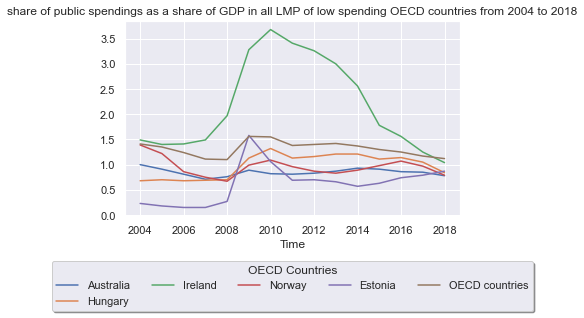

In [22]:
ax = total[(total.Country == low_tot_countries[0])].plot(x = "Time", y = "Value", label = low_tot_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(low_tot_countries)):
    total[(total.Country == low_tot_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = low_tot_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in all LMP of low spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in all LMP of high spending OECD countries from 2004 to 2018')

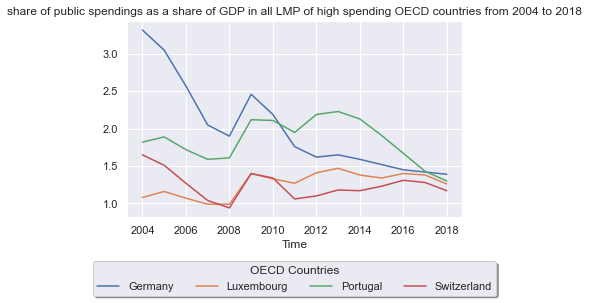

In [23]:
ax = total[(total.Country == high_tot_countries[0])].plot(x = "Time", y = "Value", label = high_tot_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(high_tot_countries)):
    total[(total.Country == high_tot_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = high_tot_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in all LMP of high spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in all LMP of very high spending OECD countries from 2004 to 2018')

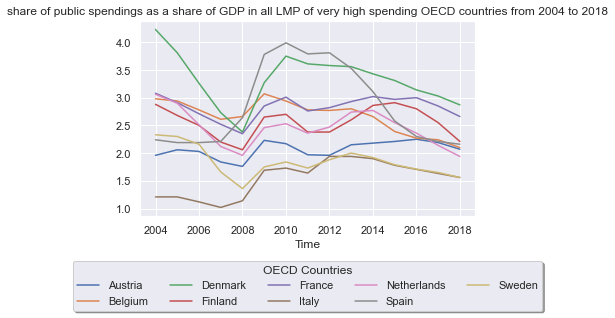

In [24]:
ax = total[(total.Country == vhigh_tot_countries[0])].plot(x = "Time", y = "Value", label = vhigh_tot_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(vhigh_tot_countries)):
    total[(total.Country == vhigh_tot_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = vhigh_tot_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in all LMP of very high spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in all LMPs of changing OECD countries from 2004 to 2018 in PPP USD')

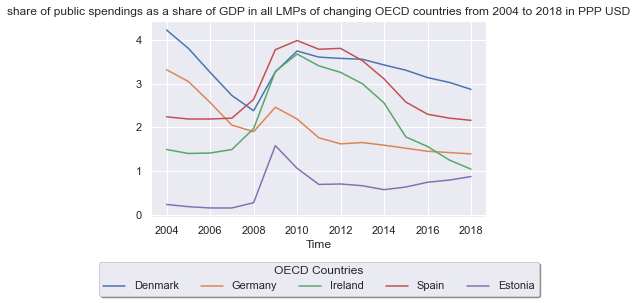

In [25]:
dict_stds =  {}
countries = total["Country"].unique()
for country in countries:
    dict_stds[country] = total[total.Country == country]["Value"].std()

stds = list(dict_stds.values())
mean_stds = np.mean(stds)
std_stds = np.std(stds)
tot_changing_countries = []
for country in countries:
    if dict_stds[country] >= mean_stds + 0.5*std_stds:
        tot_changing_countries.append(country)
    
ax = total[(total.Country == tot_changing_countries[0])].plot(x = "Time", y = "Value", label = tot_changing_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(tot_changing_countries)):
    total[(total.Country == tot_changing_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = tot_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in all LMPs of changing OECD countries from 2004 to 2018 in PPP USD")

### apprenticeship

In [26]:
avg_app = apprenticeship[(apprenticeship.Time == 2018)]["Value"].mean()
std_app = apprenticeship[apprenticeship.Time == 2018]["Value"].std()
vlow_app_countries = apprenticeship[(apprenticeship.Time == 2018) & (apprenticeship.Value < avg_app - 0.1*std_app)]["Country"].reset_index(drop = True)
low_app_countries = apprenticeship[(apprenticeship.Time == 2018) & (avg_app - 0.1*std_app <= apprenticeship.Value) & (apprenticeship.Value < avg_app)]["Country"].reset_index(drop = True)
high_app_countries = apprenticeship[(apprenticeship.Time == 2018) & (avg_app <= apprenticeship.Value) & (apprenticeship.Value < avg_app + std_app)]["Country"].reset_index(drop = True)
vhigh_app_countries = apprenticeship[(apprenticeship.Time == 2018) & (apprenticeship.Value >= avg_app + std_app)]["Country"].reset_index(drop = True)

Text(0.5, 1.0, 'share of public spendings as a share of GDP in apprenticeship programs of very low spending OECD countries from 2004 to 2018')

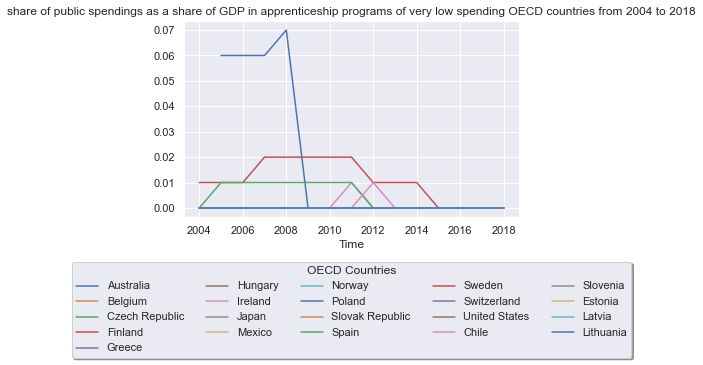

In [27]:
ax = apprenticeship[(apprenticeship.Country == vlow_app_countries[0])].plot(x = "Time", y = "Value", label = vlow_app_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(vlow_app_countries)):
    apprenticeship[(apprenticeship.Country == vlow_app_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = vlow_app_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in apprenticeship programs of very low spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in apprenticeship programs of low spending OECD countries from 2004 to 2018')

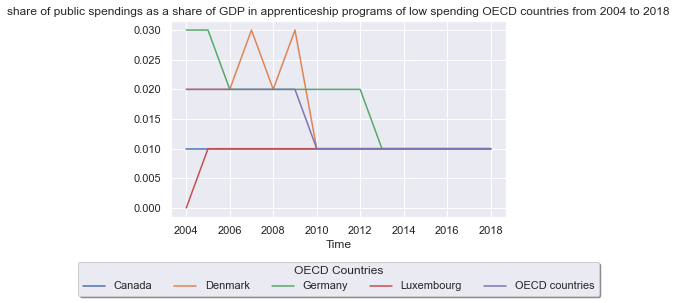

In [28]:
ax = apprenticeship[(apprenticeship.Country == low_app_countries[0])].plot(x = "Time", y = "Value", label = low_app_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(low_app_countries)):
    apprenticeship[(apprenticeship.Country == low_app_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = low_app_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in apprenticeship programs of low spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in apprenticeship programs of high spending OECD countries from 2004 to 2018')

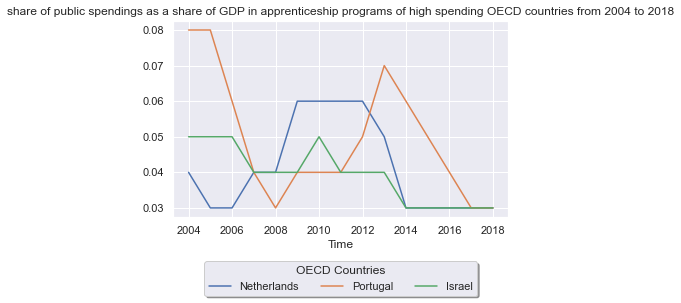

In [29]:
ax = apprenticeship[(apprenticeship.Country == high_app_countries[0])].plot(x = "Time", y = "Value", label = high_app_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(high_app_countries)):
    apprenticeship[(apprenticeship.Country == high_app_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = high_app_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in apprenticeship programs of high spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in apprenticeship programs of very high spending OECD countries from 2004 to 2018')

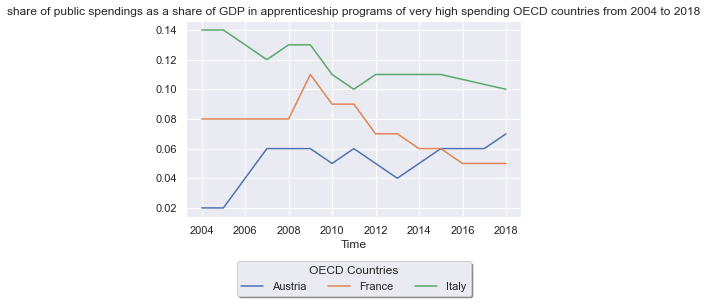

In [30]:
ax = apprenticeship[(apprenticeship.Country == vhigh_app_countries[0])].plot(x = "Time", y = "Value", label = vhigh_app_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(vhigh_app_countries)):
    apprenticeship[(apprenticeship.Country == vhigh_app_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = vhigh_app_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in apprenticeship programs of very high spending OECD countries from 2004 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in apprenticeship of changing OECD countries from 2004 to 2018 in PPP USD')

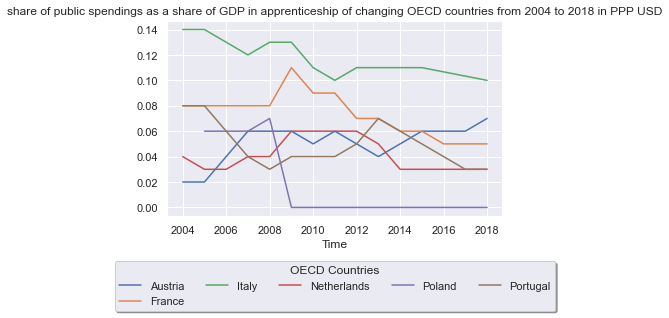

In [31]:
dict_stds =  {}
countries = apprenticeship["Country"].unique()
for country in countries:
    dict_stds[country] = apprenticeship[apprenticeship.Country == country]["Value"].std()

stds = list(dict_stds.values())
mean_stds = np.mean(stds)
std_stds = np.std(stds)
ap_changing_countries = []
for country in countries:
    if dict_stds[country] >= mean_stds + 0.5*std_stds:
        ap_changing_countries.append(country)
    
ax = apprenticeship[(apprenticeship.Country == ap_changing_countries[0])].plot(x = "Time", y = "Value", label = ap_changing_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(ap_changing_countries)):
    apprenticeship[(apprenticeship.Country == ap_changing_countries[j])].plot(x = "Time", y = "Value", ax = ax, label = ap_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in apprenticeship of changing OECD countries from 2004 to 2018 in PPP USD")

## student teacher ratio

In [32]:
stratio.dropna(axis = 0, subset = ['Value'], inplace = True)

In [33]:
stratio = stratio.assign(Mean = 0)

In [34]:
countries = stratio["Country"].unique() ##to each country, we assign a mean value for each year
for country in countries:
    years = stratio[stratio.Country == country]["Year"].unique()
    for y in years:
        mean_y = stratio[(stratio.Country == country) & (stratio.Year == y)]["Value"].mean()
        stratio.loc[(stratio.Country == country) & (stratio.Year == y), "Mean"] = mean_y

In [35]:
stratio = stratio[stratio.ISC11_LEVEL_CAT == "L1"]
stratio = stratio[['Country', 'Year', 'Mean']]

In [36]:
avg_str = stratio[(stratio.Year == 2018)]["Mean"].mean()
std_str = stratio[stratio.Year == 2018]["Mean"].std()
vlow_str_countries = stratio[(stratio.Year == 2018) & (stratio.Mean < avg_str - 0.7*std_str)]["Country"].unique()
low_str_countries = stratio[(stratio.Year == 2018) & (avg_str - 0.7*std_str <= stratio.Mean) & (stratio.Mean < avg_str)]["Country"].unique()
high_str_countries = stratio[(stratio.Year == 2018) & (avg_str <= stratio.Mean) & (stratio.Mean < avg_str + 0.5*std_str)]["Country"].unique()
vhigh_str_countries = stratio[(stratio.Year == 2018) & (stratio.Mean >= avg_str + std_str)]["Country"].unique()

Text(0.5, 1.0, ' mean of student teacher ratio among all levels of education of very low str OECD countries from 2013 to 2018')

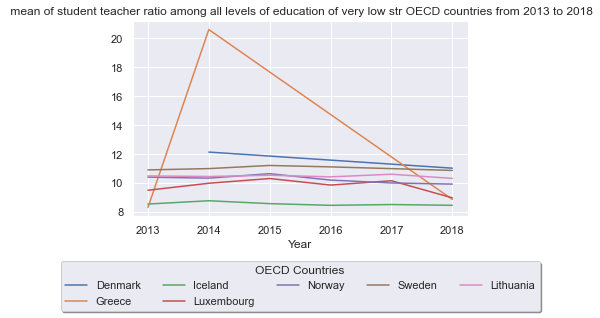

In [37]:
ax = stratio[(stratio.Country == vlow_str_countries[0])].plot(x = "Year", y = "Mean", label = vlow_str_countries[0], xticks = [2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(vlow_str_countries)):
    stratio[(stratio.Country == vlow_str_countries[j])].plot(x = "Year", y = "Mean", ax = ax, label = vlow_str_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title(" mean of student teacher ratio among all levels of education of very low str OECD countries from 2013 to 2018")

Text(0.5, 1.0, ' mean of student teacher ratio among all levels of education of low str OECD countries from 2013 to 2018')

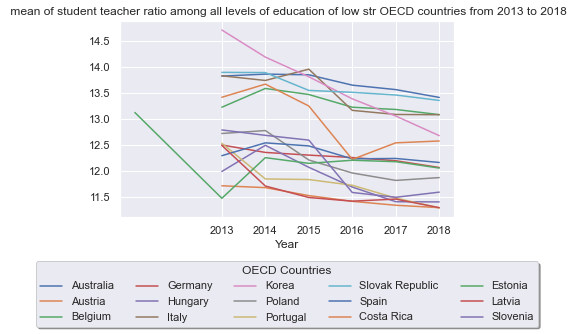

In [38]:
ax = stratio[(stratio.Country == low_str_countries[0])].plot(x = "Year", y = "Mean", label = low_str_countries[0], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(low_str_countries)):
    stratio[(stratio.Country == low_str_countries[j])].plot(x = "Year", y = "Mean", ax = ax, label = low_str_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title(" mean of student teacher ratio among all levels of education of low str OECD countries from 2013 to 2018")

Text(0.5, 1.0, ' mean of student teacher ratio among all levels of education of high str OECD countries from 2013 to 2018')

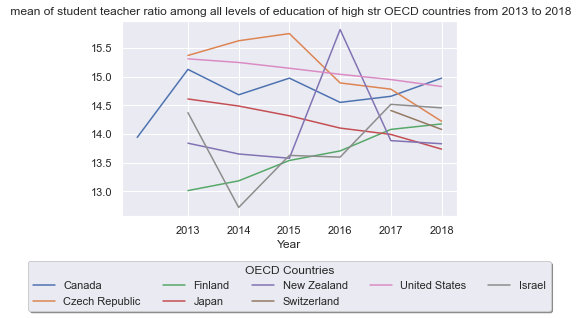

In [39]:
ax = stratio[(stratio.Country == high_str_countries[0])].plot(x = "Year", y = "Mean", label = high_str_countries[0], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(high_str_countries)):
    stratio[(stratio.Country == high_str_countries[j])].plot(x = "Year", y = "Mean", ax = ax, label = high_str_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title(" mean of student teacher ratio among all levels of education of high str OECD countries from 2013 to 2018")

Text(0.5, 1.0, ' mean of student teacher ratio among all levels of education of vhigh str OECD countries from 2013 to 2018')

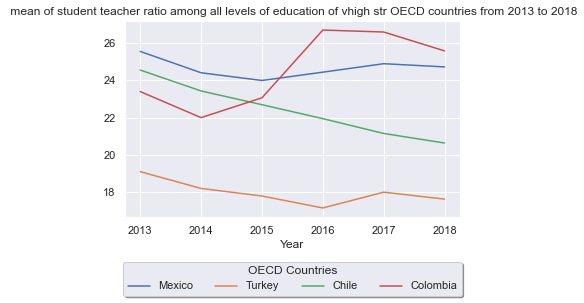

In [40]:
ax = stratio[(stratio.Country == vhigh_str_countries[0])].plot(x = "Year", y = "Mean", label = vhigh_str_countries[0], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(vhigh_str_countries)):
    stratio[(stratio.Country == vhigh_str_countries[j])].plot(x = "Year", y = "Mean", ax = ax, label = vhigh_str_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title(" mean of student teacher ratio among all levels of education of vhigh str OECD countries from 2013 to 2018")

Text(0.5, 1.0, 'student teacher ratio of changing OECD countries from 2013 to 2018')

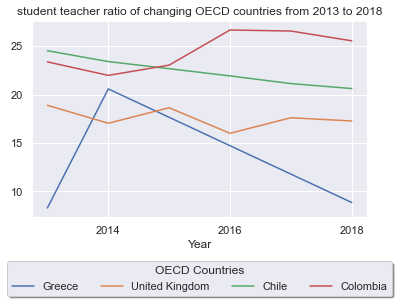

In [41]:
dict_stds =  {}
countries = stratio["Country"].unique()
for country in countries:
    dict_stds[country] = stratio[stratio.Country == country]["Mean"].std()

stds = list(dict_stds.values())
mean_stds = np.mean(stds)
std_stds = np.std(stds)
st_changing_countries = []
for country in countries:
    if dict_stds[country] >= mean_stds + 0.2*std_stds:
        st_changing_countries.append(country)
    
ax = stratio[(stratio.Country == st_changing_countries[0])].plot(x = "Year", y = "Mean", label = st_changing_countries[0], xticks = [2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
for j in range(1, len(st_changing_countries)):
    stratio[(stratio.Country == st_changing_countries[j])].plot(x = "Year", y = "Mean", ax = ax, label = st_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("student teacher ratio of changing OECD countries from 2013 to 2018")

## NEET rate

In [42]:
neet = pd.read_csv("./projetMODS206/code/neet_rate_1997_2018.csv")

### analyse depuis 1997

In [43]:
neet = neet[neet.Subject == "15_29"]
avg_neet = neet[(neet.Time == 2018)]["NEET"].mean()
std_neet = neet[neet.Time == 2018]["NEET"].std()
vlow_neet_countries = neet[(neet.Time == 2018) & (neet.NEET < avg_neet - 0.7*std_neet)]["Country"].unique()
low_neet_countries = neet[(neet.Time == 2018) & (avg_neet - 0.7*std_neet <= neet.NEET) & (neet.NEET < 0.9*avg_neet)]["Country"].unique()
high_neet_countries = neet[(neet.Time == 2018) & (0.9*avg_neet <= neet.NEET) & (neet.NEET < avg_neet + 0.5*std_neet)]["Country"].unique()
vhigh_neet_countries = neet[(neet.Time == 2018) & (neet.NEET >= avg_neet + 0.5*std_neet)]["Country"].unique()

Text(0.5, 1.0, 'NEET rate of very low neet rate OECD countries from 1997 to 2018')

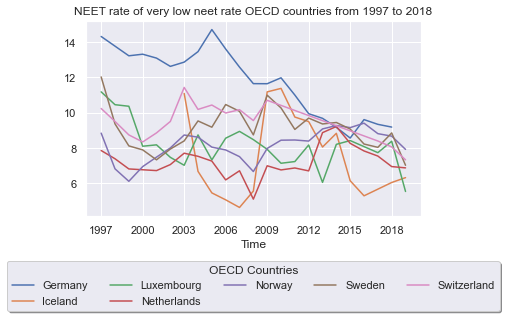

In [44]:
ax = neet[(neet.Country == vlow_neet_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[vlow_neet_countries[0]], xticks = [1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
for j in range(1, len(vlow_neet_countries)):
    neet[(neet.Country == vlow_neet_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[vlow_neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of very low neet rate OECD countries from 1997 to 2018")

Text(0.5, 1.0, 'NEET rate of low neet rate OECD countries from 1997 to 2018')

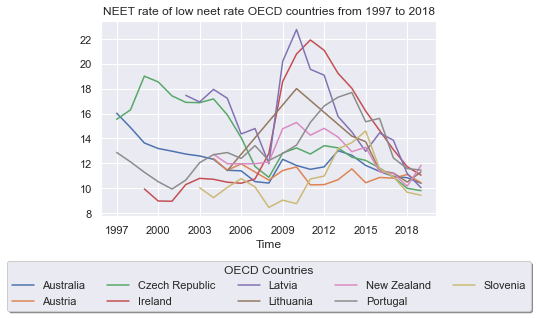

In [45]:
ax = neet[(neet.Country == low_neet_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[low_neet_countries[0]], xticks = [1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
for j in range(1, len(low_neet_countries)):
    neet[(neet.Country == low_neet_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[low_neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of low neet rate OECD countries from 1997 to 2018")

Text(0.5, 1.0, 'NEET rate of high neet rate OECD countries from 1997 to 2018')

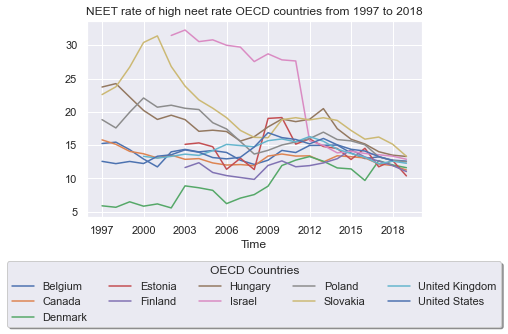

In [46]:
ax = neet[(neet.Country == high_neet_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[high_neet_countries[0]], xticks = [1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
for j in range(1, len(high_neet_countries)):
    neet[(neet.Country == high_neet_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[high_neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of high neet rate OECD countries from 1997 to 2018")

Text(0.5, 1.0, 'NEET rate of very high neet rate OECD countries from 1997 to 2018')

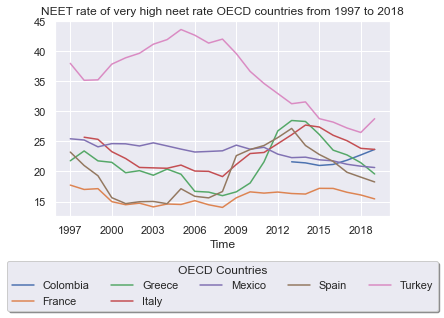

In [47]:
ax = neet[(neet.Country == vhigh_neet_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[vhigh_neet_countries[0]], xticks = [1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
for j in range(1, len(vhigh_neet_countries)):
    neet[(neet.Country == vhigh_neet_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[vhigh_neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of very high neet rate OECD countries from 1997 to 2018")

Text(0.5, 1.0, 'NEET rate of changing OECD countries from 1997 to 2018')

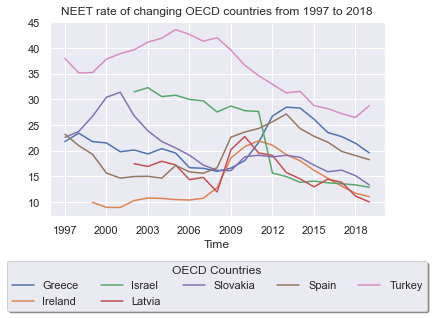

In [48]:
dict_stds =  {}
countries = neet["Country"].unique()
for country in countries:
    dict_stds[country] = neet[neet.Country == country]["NEET"].std()

stds = list(dict_stds.values())
mean_stds = np.mean(stds)
std_stds = np.std(stds)
nt_changing_countries = []
for country in countries:
    if dict_stds[country] >= mean_stds + 0.5*std_stds:
        nt_changing_countries.append(country)
    
ax = neet[(neet.Country == nt_changing_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[nt_changing_countries[0]], xticks = [1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
for j in range(1, len(nt_changing_countries)):
    neet[(neet.Country == nt_changing_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[nt_changing_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of changing OECD countries from 1997 to 2018")

### analyse depuis 2013

In [49]:
neet = neet[(neet.Time >= 2013) & (neet.Time < 2019)]
avg_neet = neet[(neet.Time == 2018)]["NEET"].mean()
std_neet = neet[neet.Time == 2018]["NEET"].std()
vlow_neet_countries = neet[(neet.Time == 2018) & (neet.NEET < avg_neet - 0.7*std_neet)]["Country"].unique()
low_neet_countries = neet[(neet.Time == 2018) & (avg_neet - 0.7*std_neet <= neet.NEET) & (neet.NEET < 0.9*avg_neet)]["Country"].unique()
high_neet_countries = neet[(neet.Time == 2018) & (0.9*avg_neet <= neet.NEET) & (neet.NEET < avg_neet + 0.5*std_neet)]["Country"].unique()
vhigh_neet_countries = neet[(neet.Time == 2018) & (neet.NEET >= avg_neet + std_neet)]["Country"].unique()

Text(0.5, 1.0, 'NEET rate of very low neet rate OECD countries from 2013 to 2018')

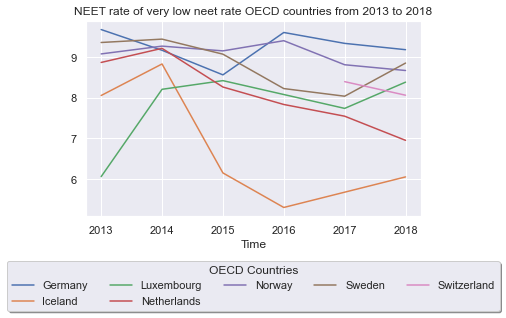

In [50]:
ax = neet[(neet.Country == vlow_neet_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[vlow_neet_countries[0]], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(vlow_neet_countries)):
    neet[(neet.Country == vlow_neet_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[vlow_neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of very low neet rate OECD countries from 2013 to 2018")

Text(0.5, 1.0, 'NEET rate of low neet rate OECD countries from 2013 to 2018')

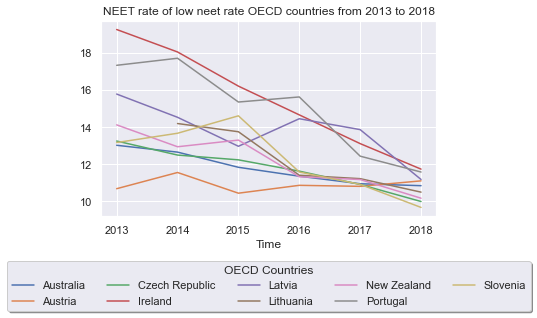

In [51]:
ax = neet[(neet.Country == low_neet_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[low_neet_countries[0]], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(low_neet_countries)):
    neet[(neet.Country == low_neet_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[low_neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of low neet rate OECD countries from 2013 to 2018")

Text(0.5, 1.0, 'NEET rate of high neet rate OECD countries from 2013 to 2018')

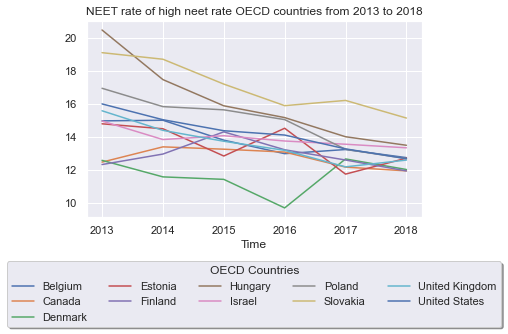

In [52]:
ax = neet[(neet.Country == high_neet_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[high_neet_countries[0]], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(high_neet_countries)):
    neet[(neet.Country == high_neet_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[high_neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of high neet rate OECD countries from 2013 to 2018")

Text(0.5, 1.0, 'NEET rate of very high neet rate OECD countries from 2013 to 2018')

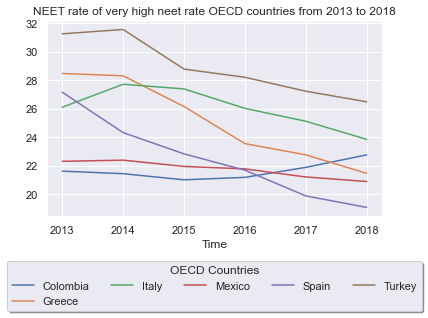

In [53]:
ax = neet[(neet.Country == vhigh_neet_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[vhigh_neet_countries[0]], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(vhigh_neet_countries)):
    neet[(neet.Country == vhigh_neet_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[vhigh_neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of very high neet rate OECD countries from 2013 to 2018")

Text(0.5, 1.0, 'NEET rate of changing OECD countries from 2013 to 2018')

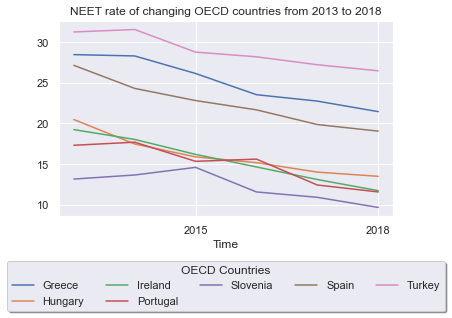

In [54]:
dict_stds =  {}
countries = neet["Country"].unique()
for country in countries:
    dict_stds[country] = neet[neet.Country == country]["NEET"].std()

stds = list(dict_stds.values())
mean_stds = np.mean(stds)
std_stds = np.std(stds)
changing_countries = []
for country in countries:
    if dict_stds[country] >= mean_stds + 0.5*std_stds:
        changing_countries.append(country)
    
ax = neet[(neet.Country == changing_countries[0])].plot(x = "Time", y = "NEET", label = oecd_countries[changing_countries[0]], xticks = [1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
for j in range(1, len(changing_countries)):
    neet[(neet.Country == changing_countries[j])].plot(x = "Time", y = "NEET", ax = ax, label = oecd_countries[changing_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of changing OECD countries from 2013 to 2018")

# introspection légère des liens entre NEET rate et les variables causales

## tracé des salaires min, des str et des public exp pour les pays dont le NEET évolue bcp

In [55]:
neet_countries = changing_countries
new_min_wage = min_wage[(min_wage.Time >= 2013) & (min_wage.Time < 2019)]
new_str = stratio[(stratio.Year >= 2013) & (stratio.Year < 2019)]
new_public_spend = public_exp_LMP[(public_exp_LMP.Time >= 2013) & (public_exp_LMP.Time < 2019)]
new_total = total[(total.Time >= 2013) & (total.Time < 2019)]
new_job_creation= job_creation[(job_creation.Time >= 2013) & (job_creation.Time < 2019)]
new_apprenticeship = apprenticeship[(apprenticeship.Time >= 2013) & (apprenticeship.Time < 2019)]

Text(0.5, 1.0, 'min wage of OECD countries with evolving NEET rate from 2013 to 2018')

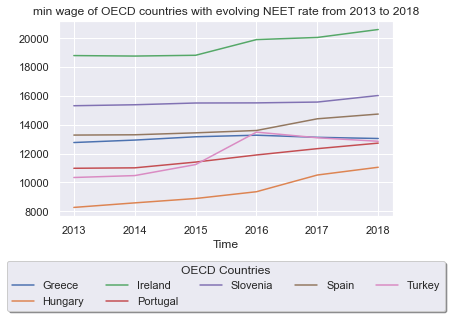

In [56]:
ax = new_min_wage[(new_min_wage.Country == oecd_countries[neet_countries[0]])].plot(x = "Time", y = "Value", label = oecd_countries[neet_countries[0]], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(neet_countries)):
    new_min_wage[(new_min_wage.Country == oecd_countries[neet_countries[j]])].plot(x = "Time", y = "Value", ax = ax, label = oecd_countries[neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("min wage of OECD countries with evolving NEET rate from 2013 to 2018")


Text(0.5, 1.0, 'student ratio of OECD countries with evolving NEET rate from 2013 to 2018')

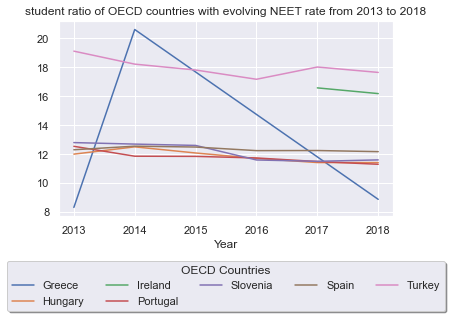

In [57]:
ax = new_str[(new_str.Country == oecd_countries[neet_countries[0]])].plot(x = "Year", y = "Mean", label = oecd_countries[neet_countries[0]], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(neet_countries)):
    new_str[(new_str.Country == oecd_countries[neet_countries[j]])].plot(x = "Year", y = "Mean", ax = ax, label = oecd_countries[neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("student ratio of OECD countries with evolving NEET rate from 2013 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP in all LMPs in labor market policies of OECD countries with evolving NEET rate from 2013 to 2018')

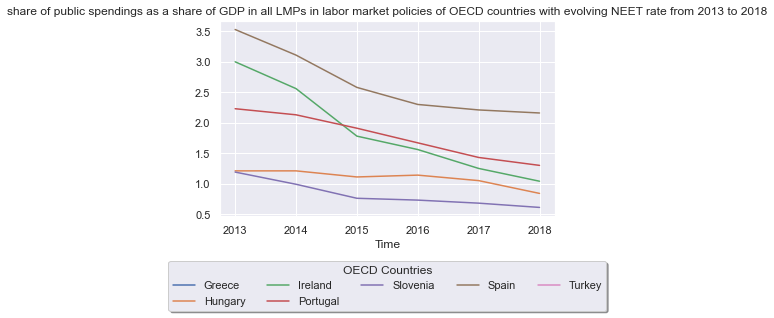

In [58]:
ax = new_total[(new_total.Country == oecd_countries[neet_countries[0]])].plot(x = "Time", y = "Value", label = oecd_countries[neet_countries[0]], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(neet_countries)):
    new_total[(new_total.Country == oecd_countries[neet_countries[j]])].plot(x = "Time", y = "Value", ax = ax, label = oecd_countries[neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP in all LMPs in labor market policies of OECD countries with evolving NEET rate from 2013 to 2018")

Text(0.5, 1.0, 'share of public spendings as a share of GDP for direct job creation policies of OECD countries with evolving NEET rate from 2013 to 2018')

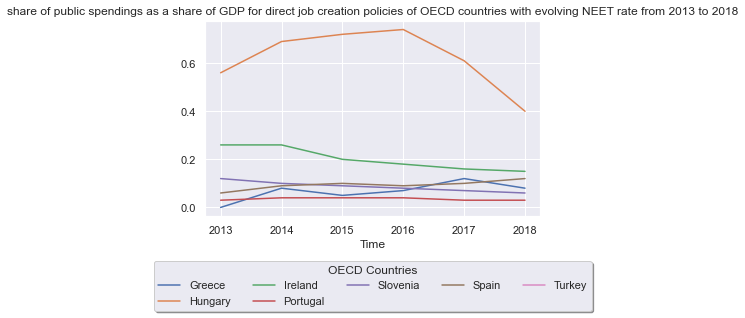

In [59]:
ax = new_job_creation[(new_job_creation.Country == oecd_countries[neet_countries[0]])].plot(x = "Time", y = "Value", label = oecd_countries[neet_countries[0]], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(neet_countries)):
    new_job_creation[(new_job_creation.Country == oecd_countries[neet_countries[j]])].plot(x = "Time", y = "Value", ax = ax, label = oecd_countries[neet_countries[j]])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("share of public spendings as a share of GDP for direct job creation policies of OECD countries with evolving NEET rate from 2013 to 2018")

## tracé des NEET des pays dont les 3 variables varient beaucoup entre 2013 et 2018

In [70]:
dict_mw = []
dict_jc = []
dict_tot = []
dict_ap = []
dict_st = []
for i in range(len(mw_changing_countries)):
    dict_mw.append(list(oecd_countries.keys())[list(oecd_countries.values()).index(mw_changing_countries[i])])
for i in range(len(jc_changing_countries)):
    dict_jc.append(list(oecd_countries.keys())[list(oecd_countries.values()).index(jc_changing_countries[i])])
for i in range(len(tot_changing_countries)):
    dict_tot.append(list(oecd_countries.keys())[list(oecd_countries.values()).index(tot_changing_countries[i])])
for i in range(len(ap_changing_countries)):
    dict_ap.append(list(oecd_countries.keys())[list(oecd_countries.values()).index(ap_changing_countries[i])])
for i in range(len(st_changing_countries)):
    dict_st.append(list(oecd_countries.keys())[list(oecd_countries.values()).index(st_changing_countries[i])])

Text(0.5, 1.0, 'NEET rate of OECD countries with changing minimum wage from 2013 to 2018')

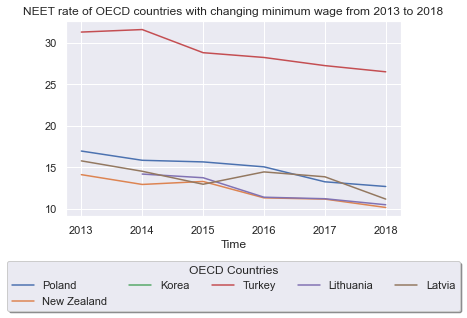

In [71]:
ax = neet[(neet.Country == dict_mw[0])].plot(x = "Time", y = "NEET", label = mw_changing_countries[0], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(dict_mw)):
    neet[(neet.Country == dict_mw[j])].plot(x = "Time", y = "NEET", ax = ax, label = mw_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of OECD countries with changing minimum wage from 2013 to 2018")

Text(0.5, 1.0, 'NEET rate of OECD countries with changing spendings in job creation from 2013 to 2018')

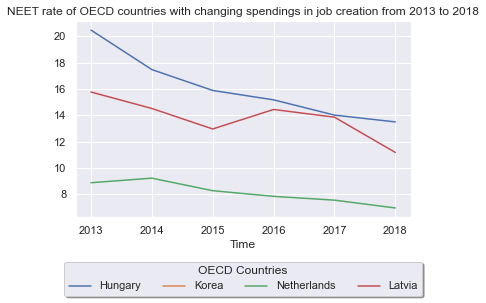

In [72]:
ax = neet[(neet.Country == dict_jc[0])].plot(x = "Time", y = "NEET", label = jc_changing_countries[0], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(dict_jc)):
    neet[(neet.Country == dict_jc[j])].plot(x = "Time", y = "NEET", ax = ax, label = jc_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of OECD countries with changing spendings in job creation from 2013 to 2018")

Text(0.5, 1.0, 'NEET rate of OECD countries with changing spendings in all LMPs from 2013 to 2018')

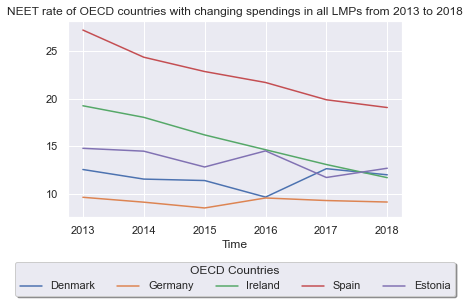

In [73]:
ax = neet[(neet.Country == dict_tot[0])].plot(x = "Time", y = "NEET", label = tot_changing_countries[0], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(dict_tot)):
    neet[(neet.Country == dict_tot[j])].plot(x = "Time", y = "NEET", ax = ax, label = tot_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of OECD countries with changing spendings in all LMPs from 2013 to 2018")

Text(0.5, 1.0, 'NEET rate of OECD countries with changing spendings in apprenticeship programs from 2013 to 2018')

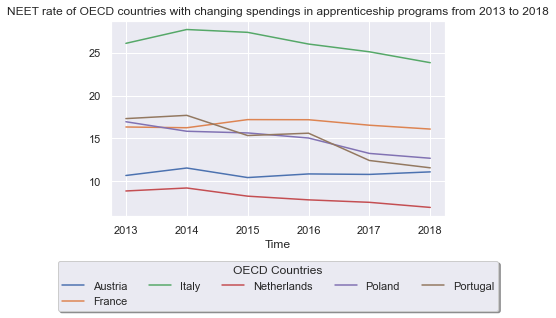

In [74]:
ax = neet[(neet.Country == dict_ap[0])].plot(x = "Time", y = "NEET", label = ap_changing_countries[0], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(dict_ap)):
    neet[(neet.Country == dict_ap[j])].plot(x = "Time", y = "NEET", ax = ax, label = ap_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of OECD countries with changing spendings in apprenticeship programs from 2013 to 2018")

Text(0.5, 1.0, 'NEET rate of OECD countries with changing student teacher ratio from 2013 to 2018')

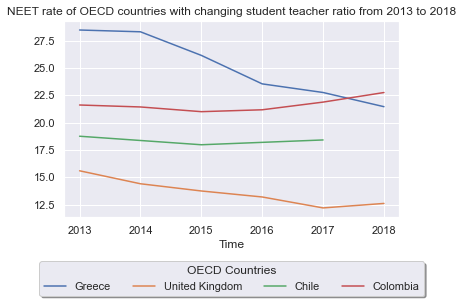

In [76]:
ax = neet[(neet.Country == dict_st[0])].plot(x = "Time", y = "NEET", label = st_changing_countries[0], xticks = [2013, 2014, 2015, 2016, 2017, 2018])
for j in range(1, len(dict_st)):
    neet[(neet.Country == dict_st[j])].plot(x = "Time", y = "NEET", ax = ax, label = st_changing_countries[j])
    

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(title = "OECD Countries", loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=5)
plt.title("NEET rate of OECD countries with changing student teacher ratio from 2013 to 2018")